# Exercício: Aplicação do PCA

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 1. Carregat Dataset MNIST

In [39]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


# 2. Vizualizando algumas imagens

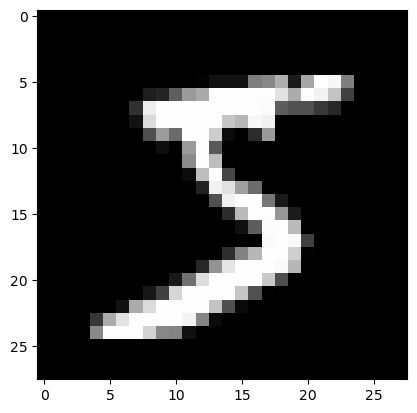

In [40]:
plt.imshow(x_train[0], cmap='gray')

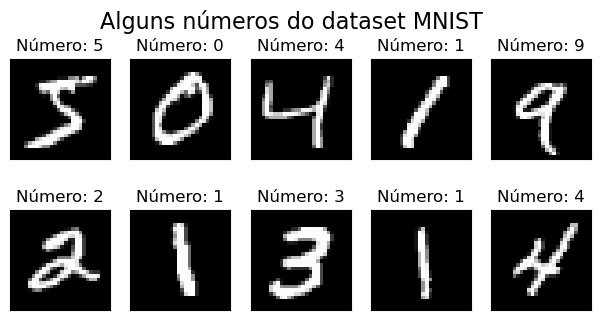

In [41]:
n_rows = 2
n_cols = 5
plt.figure(figsize=(n_cols * 1.5, n_rows * 1.8))
plt.suptitle("Alguns números do dataset MNIST", fontsize=16)

for i in range(n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(x_train[i], cmap=plt.cm.gray)
    plt.title(f"Número: {y_train[i]}")
    plt.xticks(())
    plt.yticks(())

# 3. Aplicando o PCA com vários componentes

In [72]:
component_list = [10, 20, 30, 40, 50, 75, 100]
for components in component_list:
    pca = PCA(n_components=components)
    pca.fit(x_train.reshape(len(x_train), -1))
    print(f"\nPCA com {components} componentes:")
    formatted = [f"{var:.2f}" for var in pca.explained_variance_ratio_]
    print("Variância explicada:\n", ", ".join(formatted))
    print(sum(pca.explained_variance_ratio_))


PCA com 10 componentes:
Variância explicada:
 0.10, 0.07, 0.06, 0.05, 0.05, 0.04, 0.03, 0.03, 0.03, 0.02
0.48814980354933996

PCA com 20 componentes:
Variância explicada:
 0.10, 0.07, 0.06, 0.05, 0.05, 0.04, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01
0.6435808953674768

PCA com 20 componentes:
Variância explicada:
 0.10, 0.07, 0.06, 0.05, 0.05, 0.04, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01
0.6435808953674768

PCA com 30 componentes:
Variância explicada:
 0.10, 0.07, 0.06, 0.05, 0.05, 0.04, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01
0.7305434714429171

PCA com 30 componentes:
Variância explicada:
 0.10, 0.07, 0.06, 0.05, 0.05, 0.04, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01
0.7305434714429171

PCA com 40 co

# 5. Comparando acurácia entre dados reduzidos e completos

In [55]:
train_data = x_train.reshape(len(x_train), -1)
test_data = x_test.reshape(len(x_test), -1)
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

pca = PCA(n_components=50)
train_data_pca = pca.fit_transform(train_data)
test_data_pca = pca.transform(test_data)
print("Train data PCA shape:", train_data_pca.shape)
print("Test data PCA shape:", test_data_pca.shape)

Train data shape: (60000, 784)
Test data shape: (10000, 784)
Train data PCA shape: (60000, 50)
Test data PCA shape: (10000, 50)


## 5.1 Dados completos (784 features)

In [56]:
model = SVC(kernel='rbf', C=10, gamma='scale')
model.fit(train_data, y_train)    

y_pred = model.predict(test_data)
print(classification_report(y_test, y_pred))

Training set shape: (60000, 28, 28)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## 5.2 Dados Comprimidos com PCA (50 features)

In [57]:
model = SVC(kernel='rbf', C=10, gamma='scale')
model.fit(train_data_pca, y_train)    
y_pred = model.predict(test_data_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# 6. Visualizar dois componentes principais

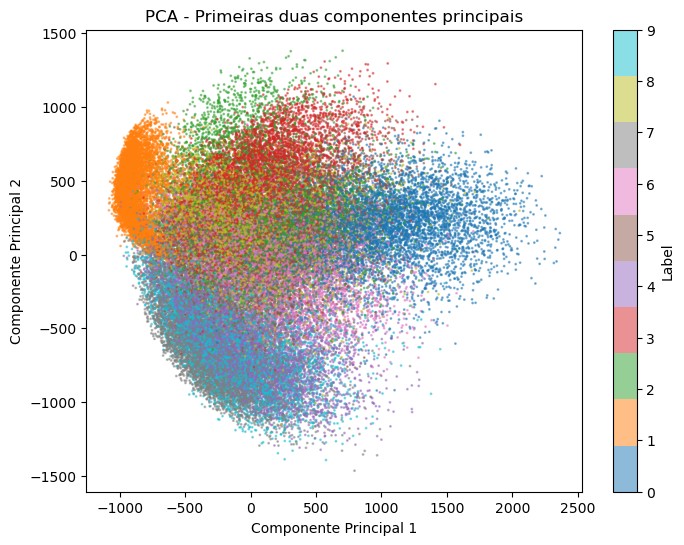

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(train_data_pca[:, 0], train_data_pca[:, 1], c=y_train, cmap='tab10', s=1, alpha=0.5)
plt.title("PCA - Primeiras duas componentes principais")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(scatter, ticks=range(10), label='Label')